In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

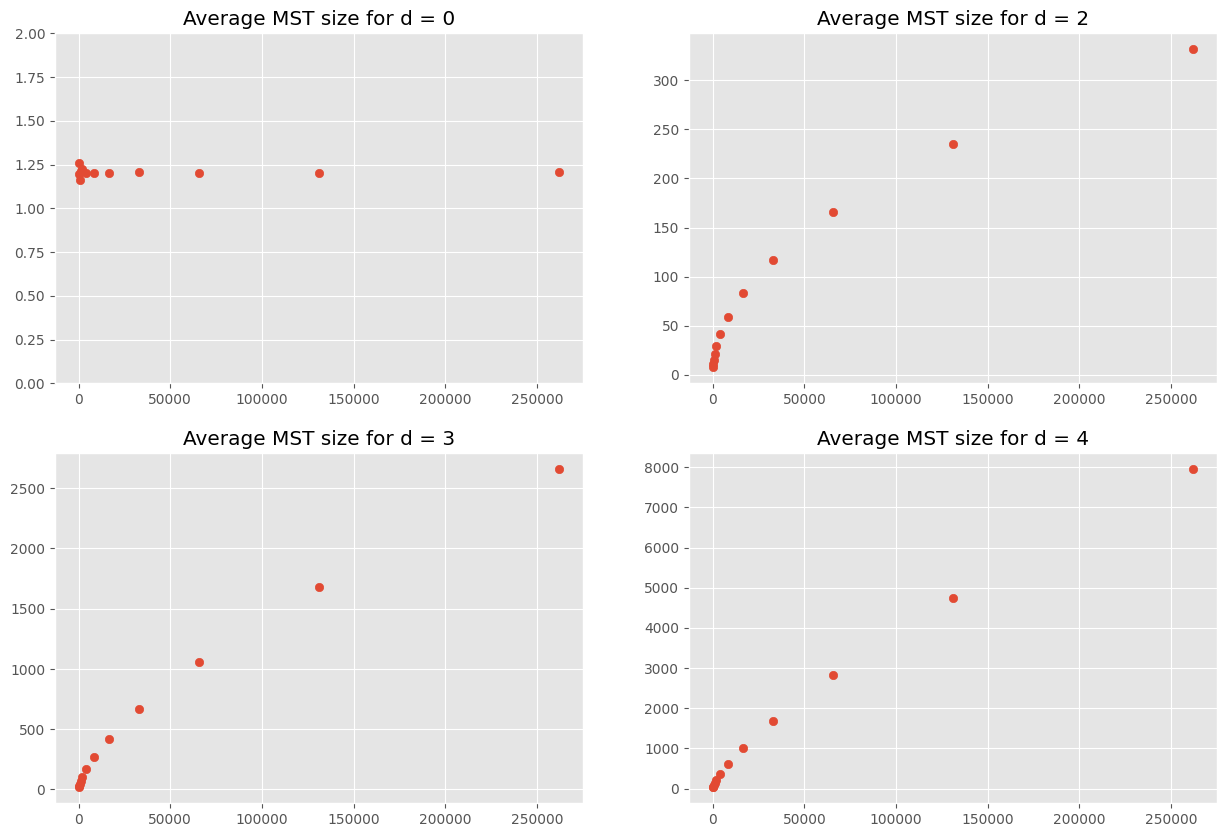

In [64]:
x = [2**n for n in range(7, 19)]

y_0 = np.array((1.19741, 1.25728, 1.16136, 1.21112, 1.22269, 1.19977, 1.20283,1.20209,1.20555,1.20292,1.20363,1.2056))
y_2 = np.array((7.6825,10.7521,15.1362,21.0197,29.5725,41.7465,58.9861,83.0889,117.43,165.978,234.597,331.588))
y_3 = np.array((17.6127,27.9478,43.5792,68.209,107.299,169.147,267.503,421.45,668.754,1058.11,1676.5,2658.1))
y_4 = np.array((28.5304, 47.3762,77.7962,129.476,216.425,360.722,602.734,1008.21,1688.81,2828.34,4739.17,7952.15))

y = [y_0, y_2, y_3, y_4]

plt.style.use("ggplot")

fig, ax = plt.subplots(2,2, figsize=(15, 10))

for i in range(4):
    ax[i // 2][i % 2].scatter(x, y[i])
    if (i == 0):
        ax[0][0].set_ylim(bottom = 0, top = 2)
        ax[i // 2][i % 2].set_title("Average MST size for d = " + str(i))
    else:
        ax[i // 2][i % 2].set_title("Average MST size for d = " + str(i+1))

In [117]:
powers = np.linspace(0, 1, num = 21)

x = np.asarray(x).reshape(-1,1)
y = np.asarray(y)

for i in range(len(y)):
    min_params = []
    min_mse = float('inf')
    for power in powers:
        y_i = y[i].reshape(-1,1)
        x_p = np.power(x, power)
        model = LinearRegression().fit(x_p, y_i)
        preds = model.predict(x_p)
        mse = mean_squared_error(x_p, y_i)
        if mse < min_mse:
            min_mse = mse
            min_params = [power, model.coef_[0][0], model.intercept_[0]]
    dim = i if i == 0 else i + 1
    print(f'MSE of (d = {dim}, power = {min_params[0]}, coef = {min_params[1]}, intercept = {min_params[2]}): {min_mse}')
    


MSE of (d = 0, power = 0.0, coef = 0.0, intercept = 1.2060208333333335): 0.04286796185833334
MSE of (d = 2, power = 0.45, coef = 1.2126077950747203, intercept = -7.888582800492074): 408.0850408900251
MSE of (d = 3, power = 0.65, coef = 0.7976829148227559, intercept = -8.297614331956538): 66252.91584054207
MSE of (d = 4, power = 0.7000000000000001, coef = 1.2754355314828167, intercept = -71.42688209427229): 348662.9499109707


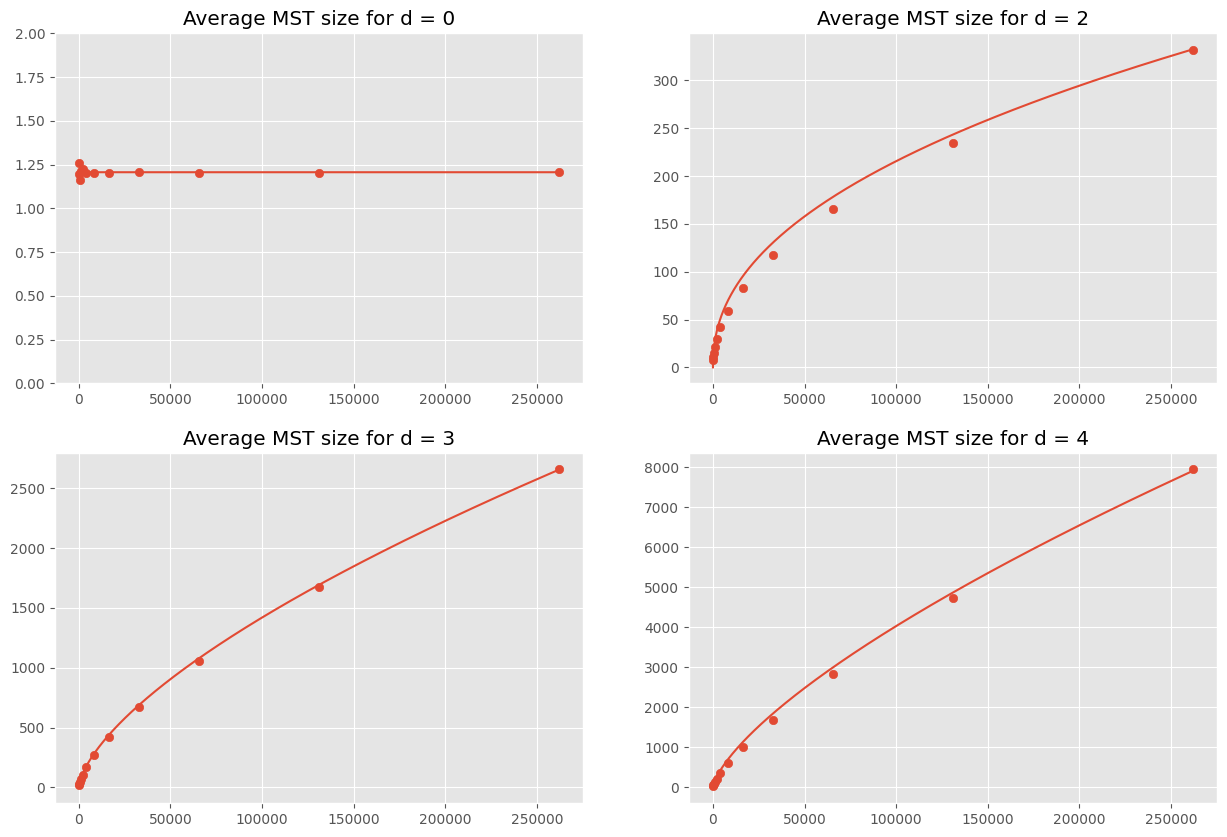

In [116]:
x = np.asarray([2**n for n in range(7, 19)])

fig, ax = plt.subplots(2,2, figsize=(15, 10))

rng = np.arange(0, 2**18, 1)
preds = [[1.206]*2**18, 1.2126*rng**0.45, 0.798*rng**0.65, 1.275*rng**0.7]

for i in range(4):
    ax[i // 2][i % 2].scatter(x, y[i])
    ax[i // 2][i % 2].plot(rng, preds[i])
    if (i == 0):
        ax[0][0].set_ylim(bottom = 0, top = 2)
        ax[i // 2][i % 2].set_title("Average MST size for d = " + str(i))
    else:
        ax[i // 2][i % 2].set_title("Average MST size for d = " + str(i+1))